# **Phân lớp**
Có rất nhiều loại trái cây được trồng trên khắp thế giới, mỗi loại lại có nhiều loại khác nhau. Yếu tố quyết định loại quả phụ thuộc đặc điểm hình dáng bên ngoài như màu sắc, chiều dài, đường kính, hình dạng. Hình thức bên ngoài của quả là yếu tố chính quyết định loại quả. Việc xác định các loại trái cây bằng cách nhìn vào hình dáng bên ngoài của chúng có thể đòi hỏi chuyên môn, tốn nhiều thời gian và công sức. Mục đích của nghiên cứu này là phân loại các loại quả chà là, đó là Barhee, Deglet Nour, Sukkary, Rotab Mozafati, Ruthana, Safawi và Sagai. 
Bộ dữ liệu gồmgồm 898 hình ảnh của bảy loại quả chà là khác nhau đã thu được thông qua hệ thống thị giác máy tính (CVS). Thông qua các kỹ thuật xử lý ảnh, tổng cộng có 34 đặc điểm, bao gồm các đặc điểm hình thái, hình dạng và màu sắc, được trích xuất từ hình ảnh quả. 



## **1. Import thư viện**

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import sklearn
from collections import Counter
%matplotlib inline

# train test split
from sklearn.model_selection import train_test_split

# presentation 
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix

# model
import lightgbm as lgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


# plot
import scikitplot as skplt

## **2. Load dữ liệu**

In [2]:
path = '/content/drive/data/'
df = pd.read_csv(path+'Date_Fruit_Datasets.csv')

In [3]:
df.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.908,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,3.2370,2.9574,4.2287,-5.919126e+10,-50714214400,-39922372608,58.7255,54.9554,47.8400,BERHI
1,338136,2085.144,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-3.423307e+10,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI
2,526843,2647.394,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.7516,3.8611,4.7192,-9.394835e+10,-74738221056,-60311207936,65.4772,59.2860,51.9378,BERHI
3,416063,2351.210,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-3.207431e+10,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI
4,347562,2160.354,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,2.7016,2.9761,4.4146,-3.998097e+10,-35980042240,-25593278464,52.7743,50.9080,42.6666,BERHI


## **3. Phân tích dữ liệu** 

### **Phân tích chung** 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           898 non-null    int64  
 1   PERIMETER      898 non-null    float64
 2   MAJOR_AXIS     898 non-null    float64
 3   MINOR_AXIS     898 non-null    float64
 4   ECCENTRICITY   898 non-null    float64
 5   EQDIASQ        898 non-null    float64
 6   SOLIDITY       898 non-null    float64
 7   CONVEX_AREA    898 non-null    int64  
 8   EXTENT         898 non-null    float64
 9   ASPECT_RATIO   898 non-null    float64
 10  ROUNDNESS      898 non-null    float64
 11  COMPACTNESS    898 non-null    float64
 12  SHAPEFACTOR_1  898 non-null    float64
 13  SHAPEFACTOR_2  898 non-null    float64
 14  SHAPEFACTOR_3  898 non-null    float64
 15  SHAPEFACTOR_4  898 non-null    float64
 16  MeanRR         898 non-null    float64
 17  MeanRG         898 non-null    float64
 18  MeanRB    

In [5]:
df.isnull().sum()

AREA             0
PERIMETER        0
MAJOR_AXIS       0
MINOR_AXIS       0
ECCENTRICITY     0
EQDIASQ          0
SOLIDITY         0
CONVEX_AREA      0
EXTENT           0
ASPECT_RATIO     0
ROUNDNESS        0
COMPACTNESS      0
SHAPEFACTOR_1    0
SHAPEFACTOR_2    0
SHAPEFACTOR_3    0
SHAPEFACTOR_4    0
MeanRR           0
MeanRG           0
MeanRB           0
StdDevRR         0
StdDevRG         0
StdDevRB         0
SkewRR           0
SkewRG           0
SkewRB           0
KurtosisRR       0
KurtosisRG       0
KurtosisRB       0
EntropyRR        0
EntropyRG        0
EntropyRB        0
ALLdaub4RR       0
ALLdaub4RG       0
ALLdaub4RB       0
Class            0
dtype: int64

In [6]:
df.Class.value_counts()

DOKOL     204
SAFAVI    199
ROTANA    166
DEGLET     98
SOGAY      94
IRAQI      72
BERHI      65
Name: Class, dtype: int64

### **Mã hóa nhãn, chia train test**

In [7]:
class_dict = {'BERHI': 0, 'DEGLET': 1, 'DOKOL': 2, 'IRAQI': 3, 'ROTANA': 4, 'SAFAVI': 5, 'SOGAY': 6}

In [8]:
df["Class"] = df["Class"].replace(class_dict)

In [9]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, 
                                                    shuffle=True, stratify=df['Class'])

In [10]:
# train_df.to_csv(path+'train.csv')
# test_df.to_csv(path+'test.csv')

train_df = pd.read_csv(path+'train.csv')
test_df = pd.read_csv(path+'test.csv')

In [11]:
train_df['Class'].value_counts()

2    163
5    159
4    133
1     78
6     75
3     58
0     52
Name: Class, dtype: int64

In [12]:
test_df['Class'].value_counts()

2    41
5    40
4    33
1    20
6    19
3    14
0    13
Name: Class, dtype: int64

### **Phân tích đơn biến**

In [13]:
train_df.describe()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
count,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,...,718.000000,718.000000,718.000000,7.180000e+02,7.180000e+02,7.180000e+02,718.000000,718.000000,718.000000,718.000000
mean,298815.518106,2060.047164,751.870599,496.365901,0.737748,605.115294,0.981627,304403.690808,0.736520,2.280387,...,4.248561,5.094351,3.785080,-3.193061e+10,-2.901389e+10,-2.771224e+10,49.983470,48.649911,47.957741,3.279944
std,107434.238592,407.937895,143.122022,114.542387,0.088372,119.662690,0.019104,108952.584882,0.054741,19.929469,...,2.919724,3.736981,2.105121,2.055027e+10,1.727179e+10,1.498877e+10,16.013203,14.081267,10.809773,1.802962
min,1987.000000,933.937000,342.796900,2.283200,0.376300,50.298400,0.836600,2257.000000,0.512300,1.079300,...,1.708200,1.607600,1.767200,-1.091220e+11,-9.261697e+10,-8.747177e+10,15.191100,20.558000,22.130000,0.000000
25%,206150.000000,1724.572075,641.406600,402.282450,0.683525,512.326150,0.978900,208824.500000,0.707050,1.369950,...,2.535925,2.510075,2.581175,-4.467821e+10,-3.900296e+10,-3.560495e+10,38.342525,38.655475,38.853200,2.000000
50%,319102.500000,2196.487400,792.763750,495.299050,0.755050,637.411750,0.987500,326912.000000,0.748350,1.525100,...,3.055750,3.124550,3.071050,-2.821704e+10,-2.621344e+10,-2.392928e+10,53.686650,50.224400,49.343500,4.000000
75%,384050.000000,2391.759000,859.091675,588.994125,0.802650,699.276450,0.991800,389406.750000,0.777675,1.676750,...,4.440025,7.273700,4.234475,-1.446792e+10,-1.419516e+10,-1.639635e+10,62.828325,59.295300,56.556900,5.000000
max,546063.000000,2722.683100,1222.723000,766.453600,1.000000,833.827900,0.997400,552598.000000,0.856200,535.525700,...,26.171100,26.736700,32.249500,-1.627316e+08,-5.627727e+08,-4.370435e+08,79.828900,83.064900,74.104600,6.000000


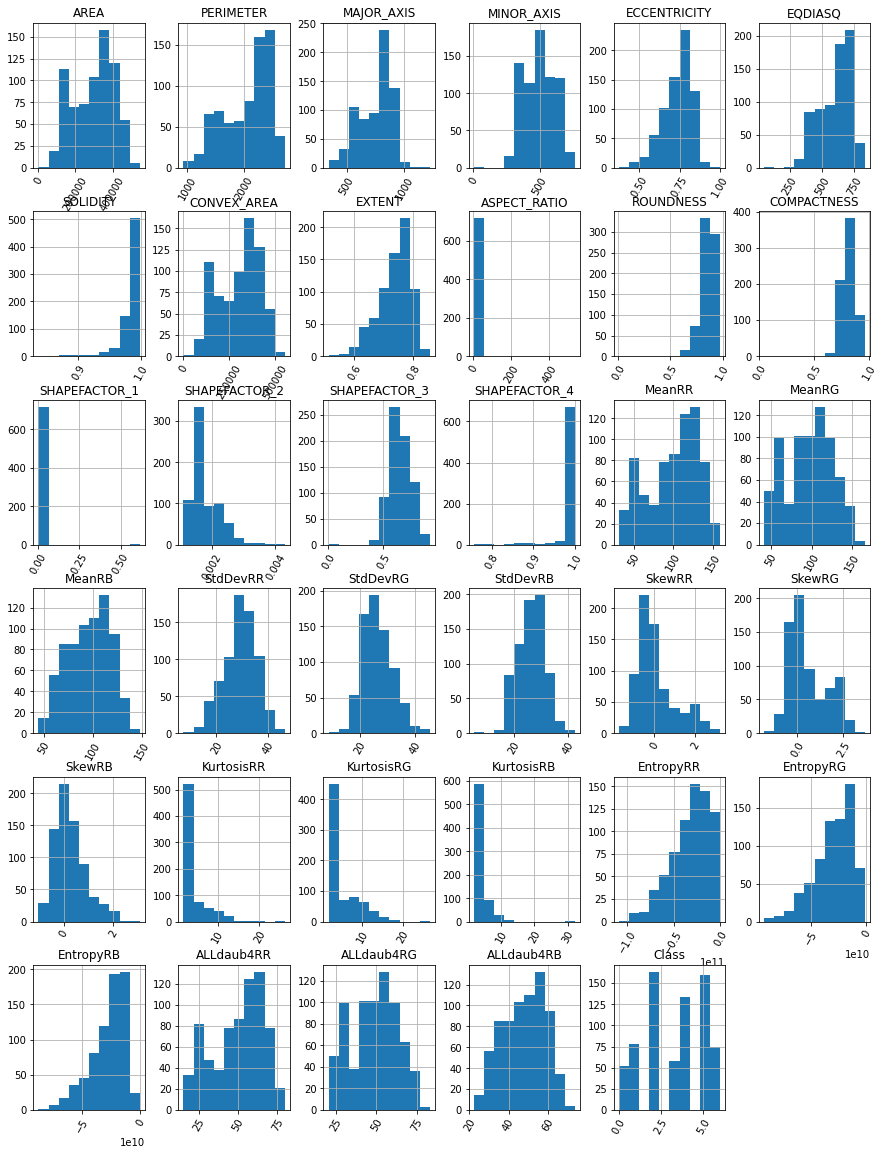

In [14]:
train_df.hist(figsize=(15,20), xrot=60);

### **Phân tích đa biến**

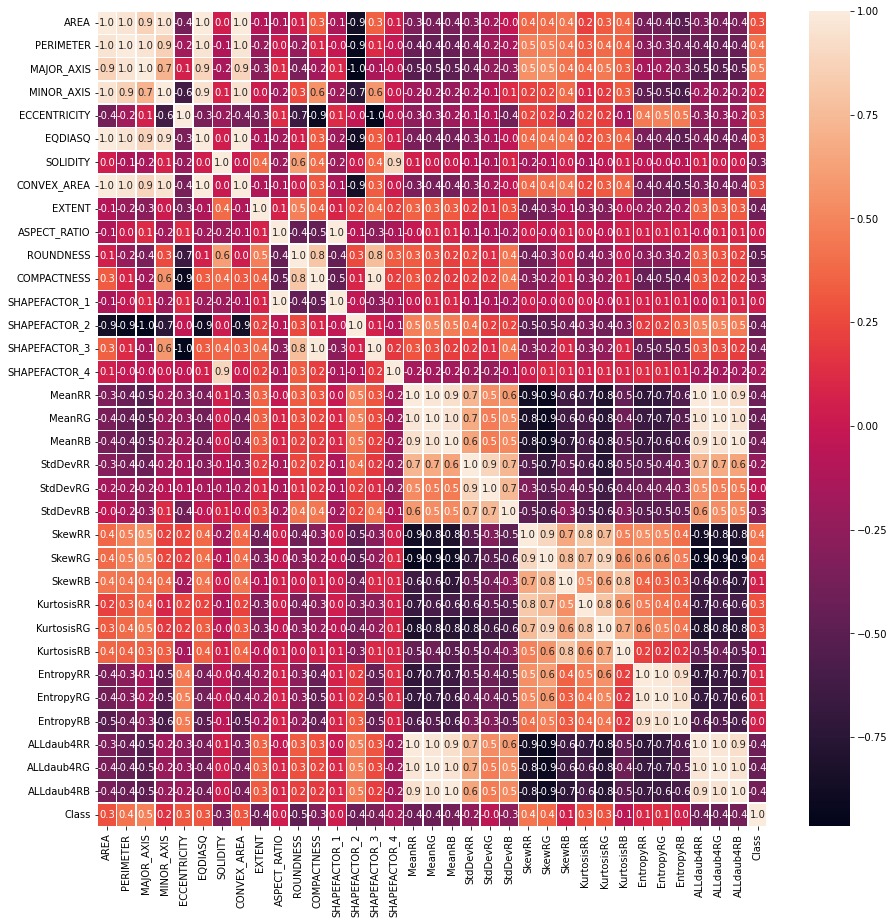

In [15]:
fig,ax = plt.subplots(figsize=(15, 15))
axes = sns.heatmap(train_df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, cmap="rocket")

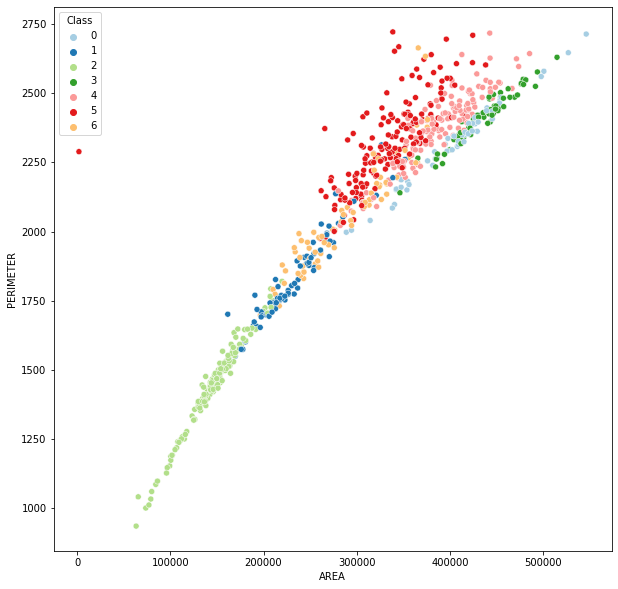

In [16]:
#So sanh gia tri Area vaf PERIMETER voi tung nhan
plt.figure(figsize=(10,10))
sns.scatterplot(x=train_df['AREA'],y=train_df['PERIMETER'],hue=train_df["Class"],palette='Paired',legend='auto')

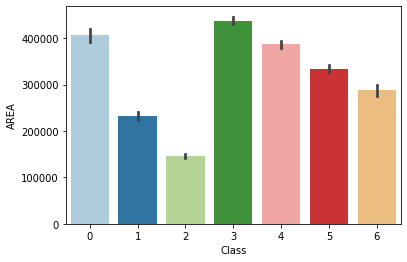

In [17]:
#barplot in ra gia tri trung binh
sns.barplot(x=train_df["Class"],y=train_df['AREA'],palette='Paired')

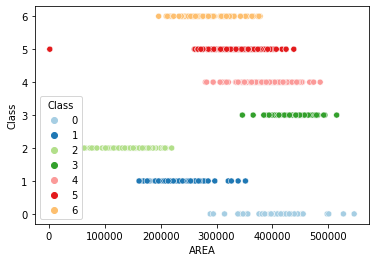

In [18]:
#phan bo area doi voi moi class
sns.scatterplot(x=train_df['AREA'],y=train_df["Class"],hue=train_df["Class"],palette='Paired')

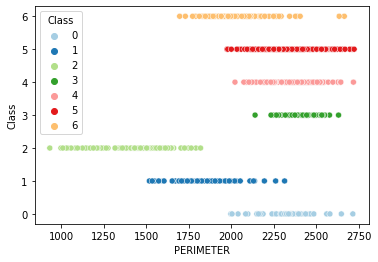

In [19]:
#phan bo perimeter voi moi class
sns.scatterplot(x=train_df['PERIMETER'],y=train_df["Class"],hue=train_df["Class"],palette='Paired')

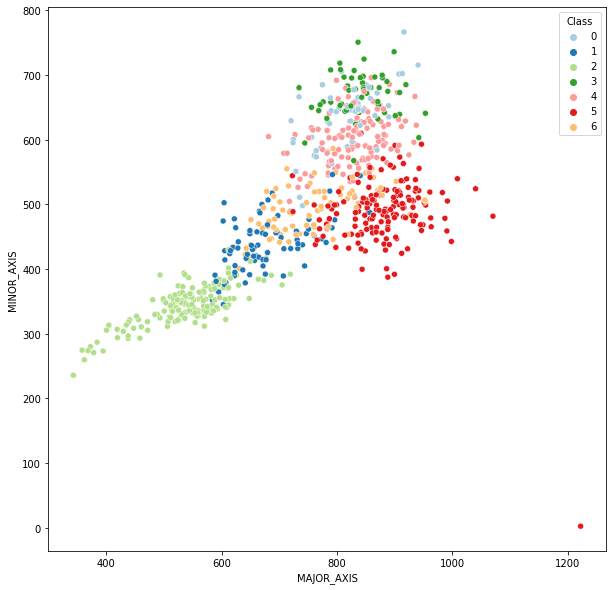

In [20]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=train_df['MAJOR_AXIS'],y=train_df['MINOR_AXIS'],hue=train_df["Class"],palette='Paired',legend='auto')

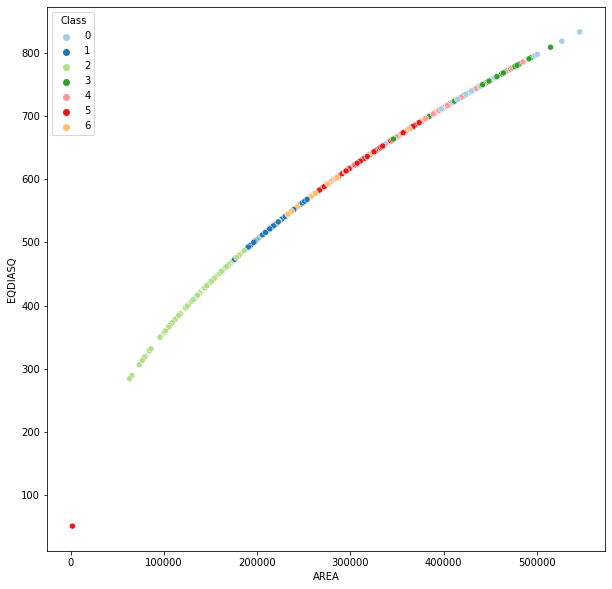

In [21]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=train_df['AREA'],y=train_df['EQDIASQ'],hue=train_df["Class"],palette='Paired',legend='auto')

In [ ]:
for feature in df.columns:
    plt.figure(figsize=(12,6))
    sns.swarmplot(x=train_df["Class"], y=train_df[feature], color="black", alpha=0.7)
    sns.boxplot(x=train_df["Class"], y=train_df[feature], palette='Paired')
    plt.show()

In [23]:
#Xu ly ngoai le
train_df = train_df[train_df['SOLIDITY'] > 0.93]
train_df = train_df[train_df['MAJOR_AXIS'] < 1000]

## **4. Lựa chọn thuộc tính** 

In [24]:
X_train_raw = train_df.drop('Class',axis=1)
y_train = train_df['Class']

X_test_raw = test_df.drop('Class',axis=1)
y_test = test_df['Class']

In [25]:
print('training shape', train_df.shape)
print('testing shape', test_df.shape)

training shape (694, 35)
testing shape (180, 35)


In [26]:
def plot_feature_importance(importance, names, model_type):
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names': feature_names, 'feature_importance': feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False, inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10, 20))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + ' FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

### **Correlation**

In [27]:
corr_feats = list(train_df.corr()[train_df.corr()['Class']>0].index)
corr_feats.remove("Class")

In [28]:
print(len(corr_feats));

16


### **Anova**

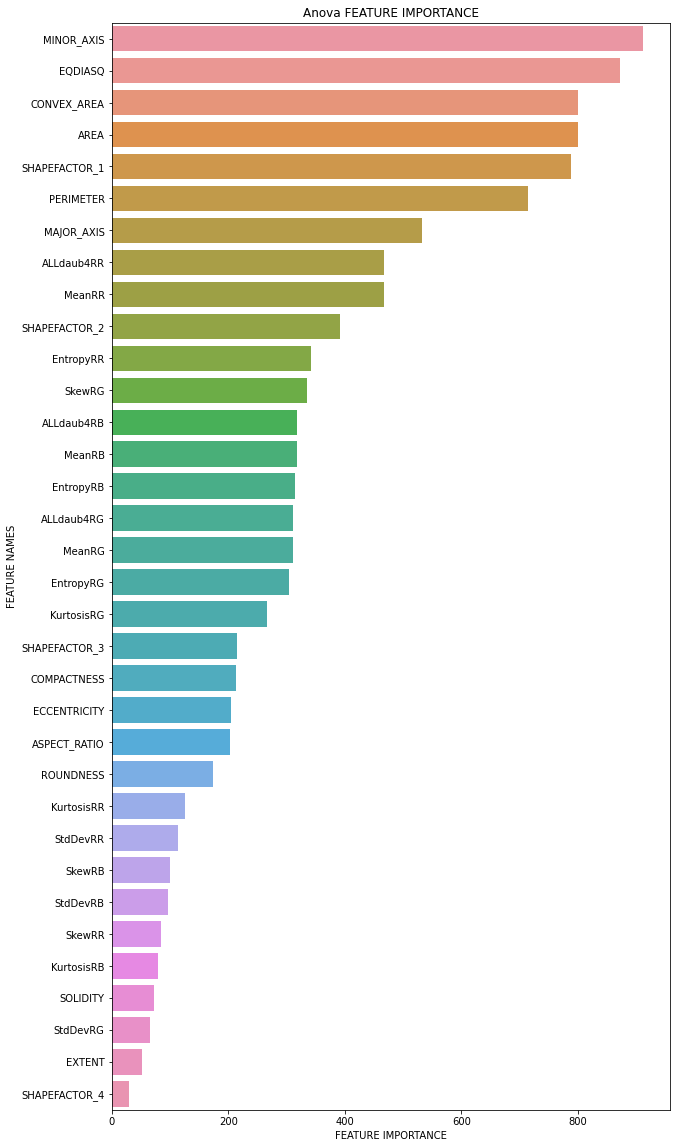

In [29]:
from sklearn.feature_selection import f_classif
anova_scores, _ = f_classif(np.abs(X_train_raw.values), y_train)

anova_feats_score = list(zip(X_train_raw.columns, anova_scores))
anova_feats_score.sort(key=lambda x: -x[1])

plot_feature_importance(
    [i[1] for i in anova_feats_score],
    [i[0] for i in anova_feats_score],
    'Anova'
)

### **Dùng kết quả mô hình**

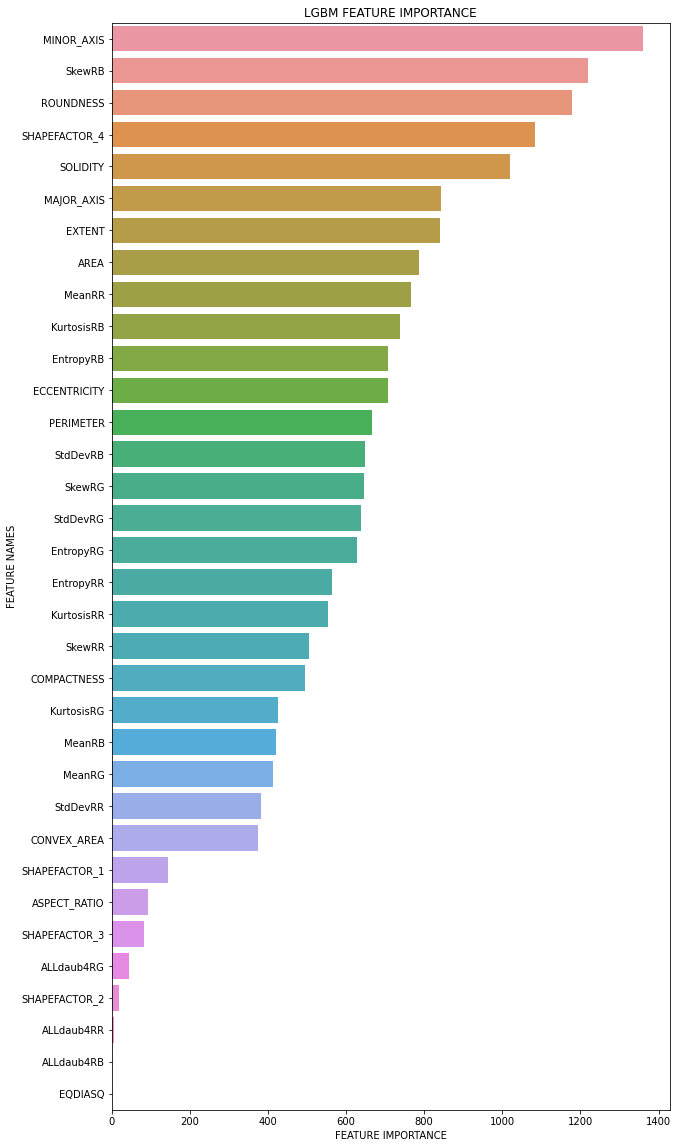

In [30]:
# Huấn luyện mô hình
model_fi = lgb.LGBMClassifier()
model_fi.fit(
    X_train_raw, y_train
)

lgbm_scores = model_fi.feature_importances_

lgbm_feats_score = list(zip(train_df.columns, lgbm_scores))
lgbm_feats_score.sort(key=lambda x: -x[1])

plot_feature_importance(
    [i[1] for i in lgbm_feats_score][:50],
    [i[0] for i in lgbm_feats_score][:50],
    'LGBM'
)

In [31]:
!pip install venn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


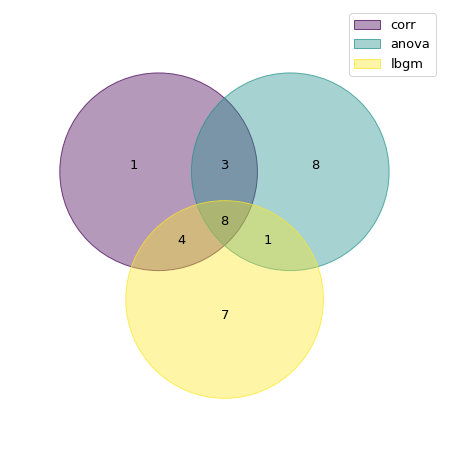

In [32]:
from venn import venn
anova_top_20feats = [i[0] for i in anova_feats_score][:20]
lgbm_top_20feats = [i[0] for i in lgbm_feats_score][:20]

topfeature_importences = {
    'corr': set(corr_feats),
    'anova': set(anova_top_20feats),
    'lbgm': set(lgbm_top_20feats)
}

venn(topfeature_importences)

## **5. Thử nghiệm mô hình phân lớp**


### **Hàm đánh giá kết quả**

In [33]:
# Tính các độ đo đánh giá mô hình
def evaluate(model, x_test, y_test):
    pred = model.predict(x_test)
    acc = accuracy_score(y_test, pred)
    print("ACC: ", acc)
    print(classification_report(y_test,pred))


# Trực quan hoá một số thông tin
def visualize_result(model, x_test, y_test):
    y_pred = model.predict(x_test)
    sns.heatmap(confusion_matrix(y_test,y_pred),cmap='Blues',annot=True,linewidths=2,linecolor='white')

### **Sử dụng toàn bộ feature** 

In [34]:
# Scaling the data using standard scaler
scaler = StandardScaler()
scaler.fit(X_train_raw)
X_train = scaler.transform(X_train_raw)
X_test = scaler.transform(X_test_raw)

print('training shape', X_train.shape)
print('testing shape', X_test.shape)

training shape (694, 34)
testing shape (180, 34)


### **KNN**

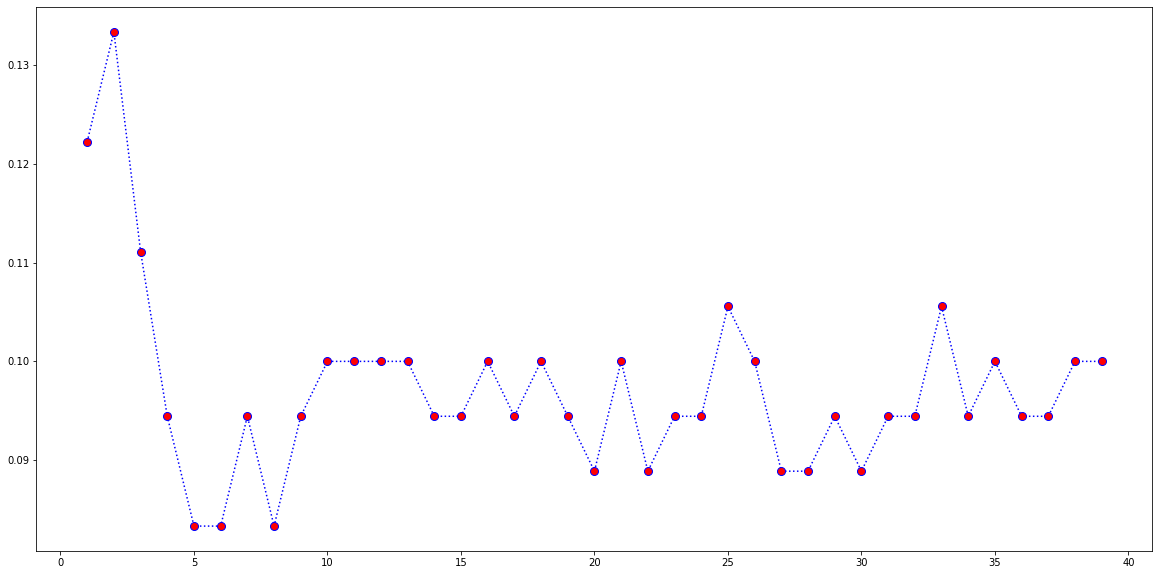

In [35]:
err_rate = [] 

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i) 
    knn.fit(X_train,y_train) 
    pred_i = knn.predict(X_test) 
    err_rate.append(np.mean(pred_i != y_test)) 
    
plt.figure(figsize=(20,10)) 
plt.plot(range(1,40),err_rate,color='blue',linestyle='dotted',marker='o',markerfacecolor='red',markersize=8)#plotting the values
plt.title = 'K Values VS Error Rates' 
plt.xlabel = 'K Value'
plt.ylabel= 'Error Rate'
plt.show()

In [36]:
knn = KNeighborsClassifier(n_neighbors=5,p=2,n_jobs=-1)
knn.fit(X_train,y_train)
knnpred = knn.predict(X_test)

ACC:  0.9166666666666666
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       0.79      0.75      0.77        20
           2       0.91      0.95      0.93        41
           3       0.93      1.00      0.97        14
           4       0.89      1.00      0.94        33
           5       0.97      0.97      0.97        40
           6       0.93      0.68      0.79        19

    accuracy                           0.92       180
   macro avg       0.92      0.90      0.90       180
weighted avg       0.92      0.92      0.91       180



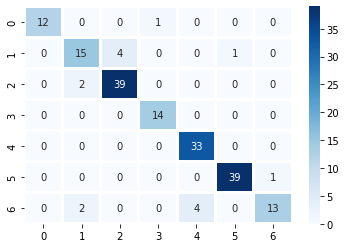

In [37]:
evaluate(knn, X_test, y_test)
visualize_result(knn, X_test, y_test)

### **SVM**

In [38]:
sup = SVC(C=10,gamma='auto',kernel='rbf')
sup.fit(X_train,y_train)

SVC(C=10, gamma='auto')

ACC:  0.9222222222222223
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       0.73      0.80      0.76        20
           2       0.95      0.95      0.95        41
           3       0.93      1.00      0.97        14
           4       0.92      1.00      0.96        33
           5       0.98      1.00      0.99        40
           6       0.92      0.63      0.75        19

    accuracy                           0.92       180
   macro avg       0.92      0.90      0.90       180
weighted avg       0.92      0.92      0.92       180



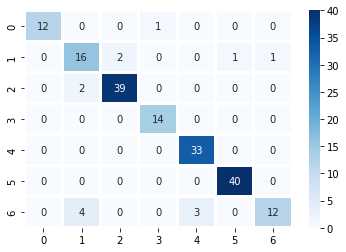

In [39]:
evaluate(sup, X_test, y_test)
visualize_result(sup, X_test, y_test)

### **Logistic regression**

In [40]:
logr = LogisticRegression(C=1,max_iter=150,multi_class='auto')
logr.fit(X_train,y_train)

LogisticRegression(C=1, max_iter=150)

ACC:  0.9111111111111111
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       0.78      0.70      0.74        20
           2       0.93      0.95      0.94        41
           3       0.93      1.00      0.97        14
           4       0.91      0.97      0.94        33
           5       0.95      1.00      0.98        40
           6       0.81      0.68      0.74        19

    accuracy                           0.91       180
   macro avg       0.90      0.89      0.89       180
weighted avg       0.91      0.91      0.91       180



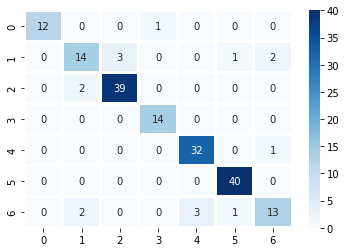

In [41]:
evaluate(logr, X_test, y_test)
visualize_result(logr, X_test, y_test)

### **Gradient Boosting Classifier**

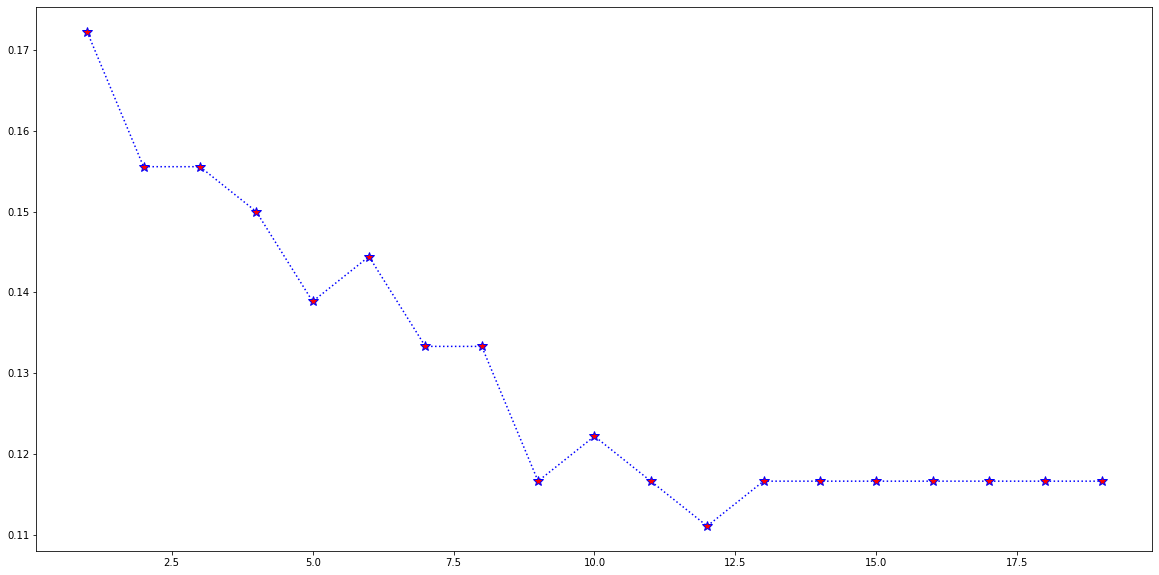

In [42]:
err = []

for i in range(1,20):
    clf = GradientBoostingClassifier(n_estimators=i*10, learning_rate=1.0,max_depth=1)
    clf.fit(X_train,y_train)
    errpred = clf.predict(X_test)
    err.append(np.mean(errpred != y_test))
    

plt.figure(figsize=(20,10))
plt.plot(range(1,20),err,color='blue',linestyle='dotted',marker='*',markerfacecolor='red',markersize=10)
plt.title = 'Number of estimators VS Error Rates'
plt.xlabel = 'Estimators' 
plt.ylabel= 'Error Rate' 
plt.show()

In [44]:
GBC = GradientBoostingClassifier(n_estimators=110, learning_rate=1.0,max_depth=1)
GBC.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, n_estimators=110)

ACC:  0.8833333333333333
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        13
           1       0.71      0.60      0.65        20
           2       0.93      0.95      0.94        41
           3       0.93      0.93      0.93        14
           4       0.87      1.00      0.93        33
           5       1.00      0.93      0.96        40
           6       0.68      0.68      0.68        19

    accuracy                           0.88       180
   macro avg       0.86      0.86      0.86       180
weighted avg       0.88      0.88      0.88       180



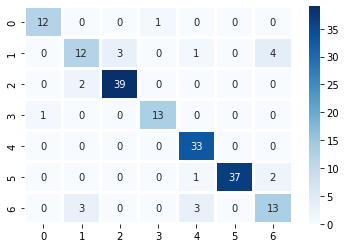

In [45]:
evaluate(GBC, X_test, y_test)
visualize_result(GBC, X_test, y_test)

### **Random forest classifier**

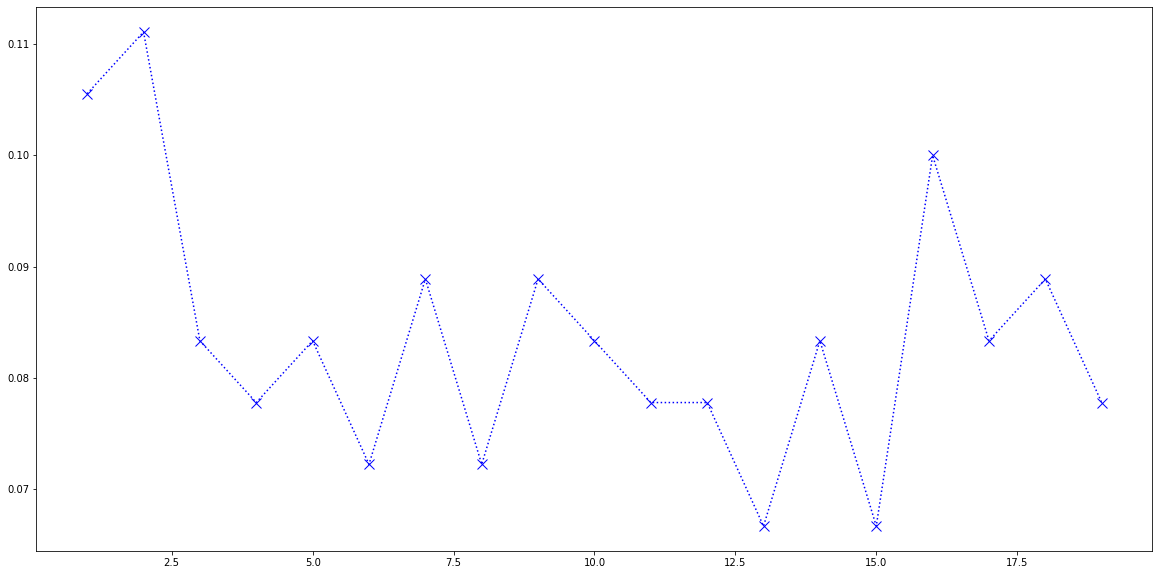

In [46]:
err = []

for i in range(1,20): 
    rfe = RandomForestClassifier(n_estimators=i*10) 
    rfe.fit(X_train,y_train) 
    errpred = rfe.predict(X_test) 
    err.append(np.mean(errpred != y_test))

plt.figure(figsize=(20,10)) 
plt.plot(range(1,20),err,color='blue',linestyle='dotted',marker='x',markerfacecolor='red',markersize=10)
plt.title = 'Number of estimators VS Error Rates'
plt.xlabel = 'Estimators' 
plt.ylabel= 'Error Rate' 
plt.show()

In [49]:
rfc = RandomForestClassifier(n_estimators=150,max_features='auto',max_depth=8)
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=8, n_estimators=150)

ACC:  0.9166666666666666
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       0.79      0.75      0.77        20
           2       0.97      0.95      0.96        41
           3       0.93      1.00      0.97        14
           4       0.94      0.97      0.96        33
           5       0.97      0.95      0.96        40
           6       0.71      0.79      0.75        19

    accuracy                           0.92       180
   macro avg       0.90      0.90      0.90       180
weighted avg       0.92      0.92      0.92       180



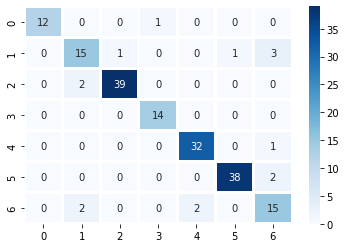

In [50]:
evaluate(rfc, X_test, y_test)
visualize_result(rfc, X_test, y_test)

Với dữ liệu số, các mô hình cây thường cho kết quả tốt nhất. Vì RF xách định ngưỡng dựa trên phân phối chuẩn -> gần với đặc tính dữ liệu. Đặc biệt tốt với dữ liệu kiểu nhị phân.

Ngoài ra RF còn tốt cho dữ liệu mất cân bằng, và dữ liệu missing.
Điểm yếu nó quá fit với dữ liệu.

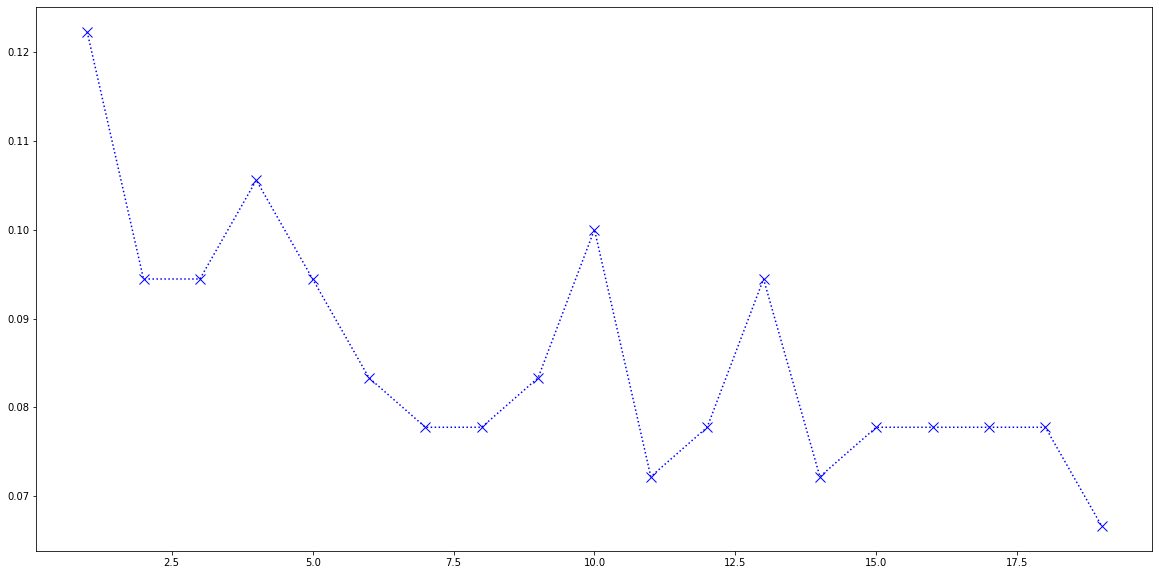

In [51]:
err = []

for i in range(1,20): 
    rfe = RandomForestClassifier(n_estimators=i*10) 
    rfe.fit(X_train_raw,y_train) 
    errpred = rfe.predict(X_test_raw) 
    err.append(np.mean(errpred != y_test))

plt.figure(figsize=(20,10)) 
plt.plot(range(1,20),err,color='blue',linestyle='dotted',marker='x',markerfacecolor='red',markersize=10)
plt.title = 'Number of estimators VS Error Rates'
plt.xlabel = 'Estimators' 
plt.ylabel= 'Error Rate' 
plt.show()

In [70]:
rfc = RandomForestClassifier(n_estimators=190,max_features='auto',max_depth=8)
rfc.fit(X_train_raw,y_train)

RandomForestClassifier(max_depth=8, n_estimators=190)

ACC:  0.9222222222222223
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       0.80      0.80      0.80        20
           2       0.97      0.95      0.96        41
           3       0.93      1.00      0.97        14
           4       0.94      0.97      0.96        33
           5       1.00      0.95      0.97        40
           6       0.71      0.79      0.75        19

    accuracy                           0.92       180
   macro avg       0.91      0.91      0.91       180
weighted avg       0.93      0.92      0.92       180



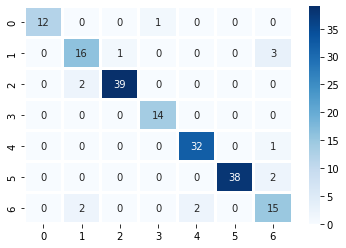

In [71]:
evaluate(rfc, X_test_raw, y_test)
visualize_result(rfc, X_test_raw, y_test)

**Sử dụng các feature tương quan cao** 

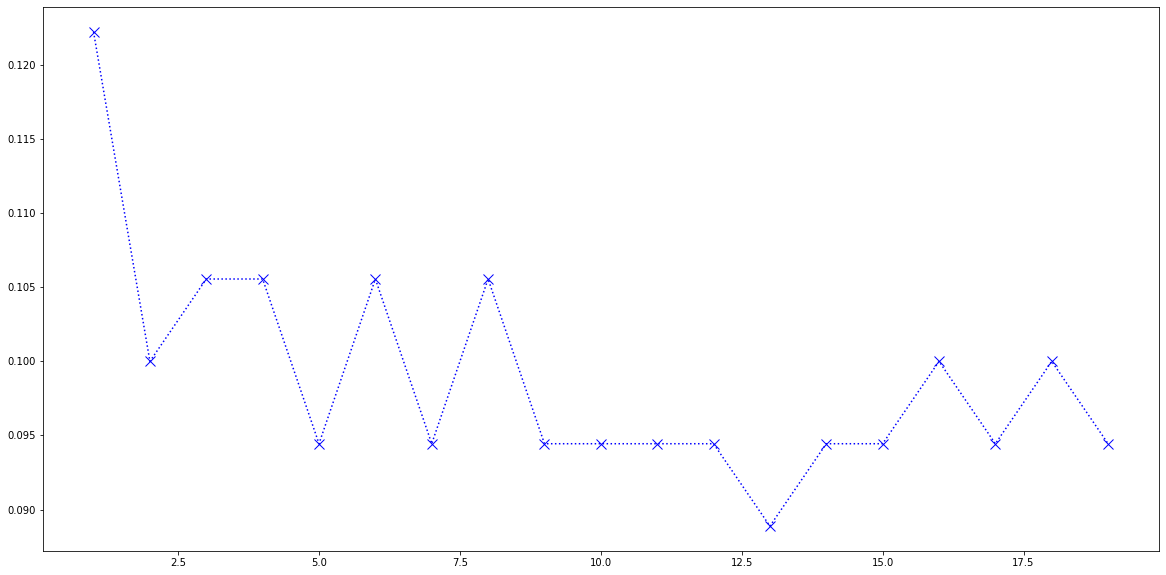

In [55]:
err = []

for i in range(1,20): 
    rfe = RandomForestClassifier(n_estimators=i*10) 
    rfe.fit(X_train_raw[corr_feats],y_train) 
    errpred = rfe.predict(X_test_raw[corr_feats]) 
    err.append(np.mean(errpred != y_test))

plt.figure(figsize=(20,10)) 
plt.plot(range(1,20),err,color='blue',linestyle='dotted',marker='x',markerfacecolor='red',markersize=10)
plt.title = 'Number of estimators VS Error Rates'
plt.xlabel = 'Estimators' 
plt.ylabel= 'Error Rate' 
plt.show()

In [57]:
rfc = RandomForestClassifier(n_estimators=180,max_features='auto',max_depth=8)
rfc.fit(X_train_raw[corr_feats],y_train)

RandomForestClassifier(max_depth=8, n_estimators=180)

ACC:  0.9111111111111111
              precision    recall  f1-score   support

           0       0.92      0.85      0.88        13
           1       0.79      0.75      0.77        20
           2       0.95      0.95      0.95        41
           3       0.93      0.93      0.93        14
           4       0.97      0.97      0.97        33
           5       0.95      0.97      0.96        40
           6       0.75      0.79      0.77        19

    accuracy                           0.91       180
   macro avg       0.89      0.89      0.89       180
weighted avg       0.91      0.91      0.91       180



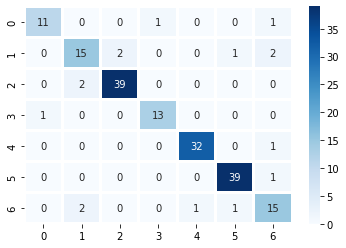

In [58]:
evaluate(rfc, X_test_raw[corr_feats], y_test)
visualize_result(rfc, X_test_raw[corr_feats], y_test)

**Sử dụng các feature anova** 

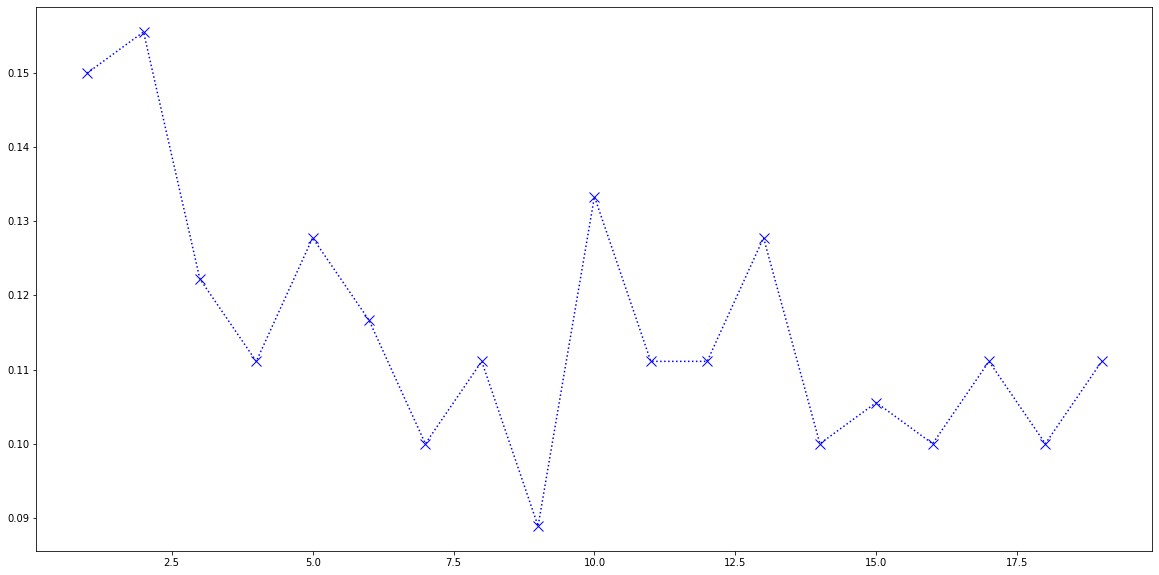

In [59]:
err = []

for i in range(1,20): 
    rfe = RandomForestClassifier(n_estimators=i*10) 
    rfe.fit(X_train_raw[anova_top_20feats],y_train) 
    errpred = rfe.predict(X_test_raw[anova_top_20feats]) 
    err.append(np.mean(errpred != y_test))

plt.figure(figsize=(20,10)) 
plt.plot(range(1,20),err,color='blue',linestyle='dotted',marker='x',markerfacecolor='red',markersize=10)
plt.title = 'Number of estimators VS Error Rates'
plt.xlabel = 'Estimators' 
plt.ylabel= 'Error Rate' 
plt.show()

In [60]:
rfc = RandomForestClassifier(n_estimators=90,max_features='auto',max_depth=8)
rfc.fit(X_train_raw[anova_top_20feats],y_train)

RandomForestClassifier(max_depth=8, n_estimators=90)

ACC:  0.8777777777777778
              precision    recall  f1-score   support

           0       0.67      0.77      0.71        13
           1       0.75      0.75      0.75        20
           2       0.95      0.95      0.95        41
           3       0.92      0.79      0.85        14
           4       0.89      0.94      0.91        33
           5       1.00      0.97      0.99        40
           6       0.72      0.68      0.70        19

    accuracy                           0.88       180
   macro avg       0.84      0.84      0.84       180
weighted avg       0.88      0.88      0.88       180



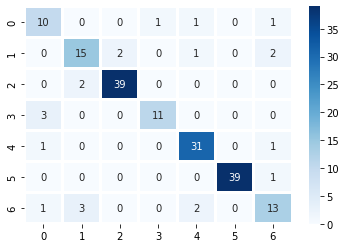

In [61]:
evaluate(rfc, X_test_raw[anova_top_20feats], y_test)
visualize_result(rfc, X_test_raw[anova_top_20feats], y_test)

**Sử dụng các feature chọn từ mô hình** 

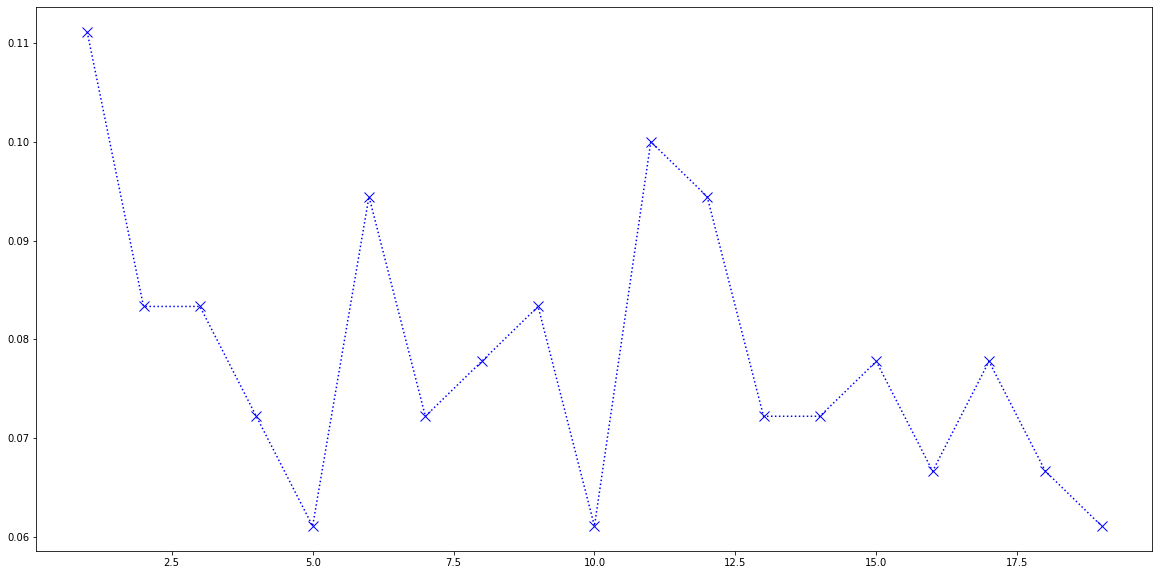

In [63]:
err = []

for i in range(1,20): 
    rfe = RandomForestClassifier(n_estimators=i*10) 
    rfe.fit(X_train_raw[lgbm_top_20feats],y_train) 
    errpred = rfe.predict(X_test_raw[lgbm_top_20feats]) 
    err.append(np.mean(errpred != y_test))

plt.figure(figsize=(20,10)) 
plt.plot(range(1,20),err,color='blue',linestyle='dotted',marker='x',markerfacecolor='red',markersize=10)
plt.title = 'Number of estimators VS Error Rates'
plt.xlabel = 'Estimators' 
plt.ylabel= 'Error Rate' 
plt.show()

In [72]:
rfc = RandomForestClassifier(n_estimators=190,max_features='auto',max_depth=8)
rfc.fit(X_train_raw[lgbm_top_20feats],y_train)

RandomForestClassifier(max_depth=8, n_estimators=190)

ACC:  0.9333333333333333
              precision    recall  f1-score   support

           0       1.00      0.85      0.92        13
           1       0.89      0.80      0.84        20
           2       0.97      0.95      0.96        41
           3       0.93      1.00      0.97        14
           4       0.97      0.97      0.97        33
           5       0.97      0.95      0.96        40
           6       0.75      0.95      0.84        19

    accuracy                           0.93       180
   macro avg       0.93      0.92      0.92       180
weighted avg       0.94      0.93      0.93       180



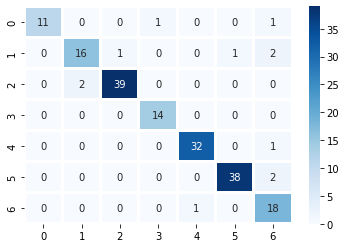

In [73]:
evaluate(rfc, X_test_raw[lgbm_top_20feats], y_test)
visualize_result(rfc, X_test_raw[lgbm_top_20feats], y_test)

Việc lựa chọn thuộc tính giúp giảm chiều dữ liệu và không làm thay đổi quá nhiều kết quả cuối cùng.

Việc sử dụng các biến tương quan mạnh với nhãn cho hiệu quả không quá cao, vì tương quan này chỉ là mối quan hệ giữa các thuộc tính và nhãn 1 cách độc lập (đơn biến). Điều này không hiệu quả vì thường kết hợp đa biến cho độ chính xác tốt hơn.

Có thể sử dụng các phương pháp lựa chọn đặc trưng như chi2, mô hình, ... Nhưng chi2 không sử dụng trong bài toán này vì dữ liệu có giá trị âm.

## **6. Phân tích lỗi** 

In [74]:
def show_error(model, x_test, y_test):
    y_pred = model.predict(x_test)
    error_df = X_test_raw
    error_df['Class'] = y_test
    error_df['Pred'] = y_pred
    error_df = error_df.sort_values(by=['Class','Pred'], ascending=True)
    return error_df

In [76]:
error = show_error(rfc, X_test_raw[lgbm_top_20feats], y_test)

In [77]:
data = X_train_raw
data['Class'] = y_train

In [78]:
data[data["Class"] == 1].describe()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
count,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,...,74.000000,74.000000,74.000000,7.400000e+01,7.400000e+01,7.400000e+01,74.000000,74.000000,74.000000,74.0
mean,233806.175676,1828.019670,677.599246,439.352564,0.755407,543.765400,0.989319,236412.648649,0.767897,1.548596,...,2.644003,2.653053,2.753016,-3.484389e+10,-2.986813e+10,-2.814855e+10,58.874164,54.813915,53.904666,1.0
std,39289.503615,166.475183,63.217935,42.219017,0.053316,45.144271,0.004357,40256.916325,0.038471,0.132522,...,0.538355,0.987778,0.550570,1.078315e+10,1.061677e+10,8.915543e+09,7.762348,8.894238,6.921461,0.0
min,161461.000000,1519.229000,583.668800,345.035100,0.555500,453.407700,0.975100,162441.000000,0.654200,1.202600,...,1.708200,1.607600,1.860800,-6.279318e+10,-6.033919e+10,-5.307011e+10,39.456800,35.236300,38.663300,1.0
25%,209324.500000,1722.330250,625.417975,414.390450,0.724525,516.255775,0.987625,211418.250000,0.748325,1.450850,...,2.266250,2.217200,2.421500,-4.222201e+10,-3.673053e+10,-3.398655e+10,54.753275,49.843850,49.357900,1.0
50%,228354.000000,1791.362500,664.223750,436.801800,0.768000,539.207800,0.990200,231080.500000,0.771650,1.561300,...,2.552950,2.510250,2.583500,-3.540008e+10,-2.949747e+10,-2.759730e+10,59.110550,55.448700,54.690150,1.0
75%,254258.250000,1917.527750,719.492400,463.144525,0.793075,568.974175,0.992300,257624.500000,0.794425,1.641675,...,2.897375,2.867875,2.939700,-2.721181e+10,-2.181797e+10,-2.121328e+10,64.374025,61.233700,58.762225,1.0
max,351733.000000,2313.791000,856.942300,546.094600,0.839100,669.208700,0.994800,359388.000000,0.831400,1.838400,...,4.554300,9.593500,4.345100,-1.128836e+10,-8.877690e+09,-1.103303e+10,74.390900,73.230600,68.965600,1.0


In [79]:
data[data["Class"] == 2].describe()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,...,159.000000,159.000000,159.000000,1.590000e+02,1.590000e+02,1.590000e+02,159.000000,159.000000,159.000000,159.0
mean,146630.905660,1442.815401,540.567392,344.232813,0.763773,429.977997,0.989090,148278.559748,0.757097,1.568577,...,3.016013,3.081167,2.772948,-2.322389e+10,-2.160997e+10,-1.877161e+10,60.784621,59.134035,55.683553,2.0
std,27928.688565,155.791750,67.573084,30.149635,0.045845,42.739699,0.005052,28398.999160,0.040897,0.126956,...,0.676350,1.185306,0.583308,8.402534e+09,8.693999e+09,5.675626e+09,9.205395,10.384273,6.313330,0.0
min,63328.000000,933.937000,342.796900,235.677200,0.609900,283.957200,0.948400,64034.000000,0.608900,1.261900,...,1.883800,1.806500,1.767200,-4.809014e+10,-4.460854e+10,-3.816292e+10,33.829600,33.833000,35.953700,2.0
25%,135957.500000,1386.272500,513.781950,327.545800,0.738650,416.060550,0.987600,137616.000000,0.731450,1.483500,...,2.519250,2.410050,2.375900,-2.831812e+10,-2.742474e+10,-2.253714e+10,54.506700,51.728750,51.591950,2.0
50%,147389.000000,1454.557000,546.436600,345.091200,0.768700,433.199200,0.989800,149481.000000,0.764100,1.563500,...,2.850400,2.732800,2.610500,-2.275034e+10,-2.083100e+10,-1.901351e+10,62.828600,60.754300,56.230800,2.0
75%,162408.500000,1523.877500,580.307750,361.947050,0.797550,454.736100,0.992200,163653.000000,0.786750,1.657750,...,3.362650,3.418450,3.030150,-1.629759e+10,-1.468256e+10,-1.452300e+10,67.614700,66.734650,60.433550,2.0
max,219822.000000,1819.831100,719.075700,429.913500,0.847800,529.042600,0.994700,222332.000000,0.849700,1.885900,...,5.177600,12.060800,5.513100,-6.105572e+09,-6.109187e+09,-6.569412e+09,78.711100,80.521500,67.883600,2.0


In [80]:
error[(error["Pred"]==1) & (error["Class"]==2)]

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class,Pred
128,242106,1897.218,733.3027,424.0022,0.8159,555.2107,0.9891,244779,0.7937,1.7295,...,2.8078,2.5781,-2.640404e+10,-18962182144,-20471883776,50.8506,44.2080,45.5415,2,1
169,194301,1671.417,615.8516,403.3667,0.7557,497.3849,0.9870,196863,0.7669,1.5268,...,2.8191,3.1837,-2.290823e+10,-17749594112,-20701300736,53.3621,47.7523,51.6339,2,1
